In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)

mouse_data.head()
clinical_data.head()

# Combine the data into a single dataset
merged_data = pd.merge(mouse_data, clinical_data, on="Mouse ID")

# Display the data table for preview
merged_data.head()



,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
group_drug_mean = merged_data.groupby(['Drug', 'Timepoint']).mean()
group_drug_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_mean_df = pd.DataFrame(group_drug_mean)

# Preview DataFrame
tumor_mean_df.head(30)

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
5,Capomulin,25,39.939528,0.818182
6,Capomulin,30,38.769339,1.090909
7,Capomulin,35,37.816839,1.181818
8,Capomulin,40,36.958001,1.380952
9,Capomulin,45,36.236114,1.476190


In [3]:
# Store the Standard Error of Tumor Volume Data Grouped by Drug and Timepoint 
group_drug_sem = merged_data.groupby(['Drug', 'Timepoint']).mean()
group_drug_sem.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(group_drug_sem)

# Preview DataFrame
tumor_sem_df.head(30)

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
5,Capomulin,25,39.939528,0.818182
6,Capomulin,30,38.769339,1.090909
7,Capomulin,35,37.816839,1.181818
8,Capomulin,40,36.958001,1.380952
9,Capomulin,45,36.236114,1.476190


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_mean_df.pivot(index ='Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
pivot_table.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
table_fourdrugs = pivot_table[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417


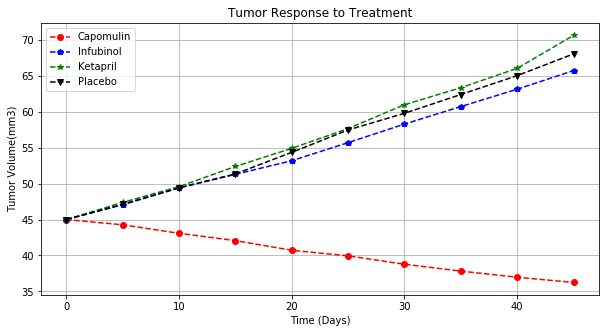

In [6]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Capomulin'], color= "red", linestyle="--", marker='o', 
             label = "Capomulin")
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Infubinol'], color= "blue", linestyle="--", marker='p',
             label = "Infubinol")
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Ketapril'], color= "green", linestyle="--",marker='*',
             label = "Ketapril")
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Placebo'], color ="black", linestyle="--", marker='v',
             label = "Placebo")

plt.ylabel("Tumor Volume(mm3)")
plt.xlabel("Time (Days)")
plt.title("Tumor Response to Treatment")
plt.grid()
plt.legend(loc="best")
plt.show()

# Save the Figure

# Show the Figure
plt.show()

In [7]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
group_mean_met= merged_data.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
met_response_mean_df = pd.DataFrame(group_mean_met["Metastatic Sites"])

# Preview DataFrame 
met_response_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
group_met_sem = merged_data.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_response_sem_df = pd.DataFrame(group_met_sem)

# Preview DataFrame
met_response_sem_df.head()

Metastatic Sites  Mouse ID  Tumor Volume (mm3)
Drug      Timepoint                                                
Capomulin 0                  0.000000       NaN            0.000000
          5                  0.074833       NaN            0.448593
          10                 0.125433       NaN            0.702684
          15                 0.132048       NaN            0.838617
          20                 0.161621       NaN            0.909731

In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_response_mean_df.reset_index(level = None, inplace = True)
met_response_mean_df2 = pd.DataFrame(tumor_mean_df)


pivot_table_met = met_response_mean_df2.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)

#Preview the Reformatted table
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
met_table_fourdrugs = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
met_table_fourdrugs.head()


Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316


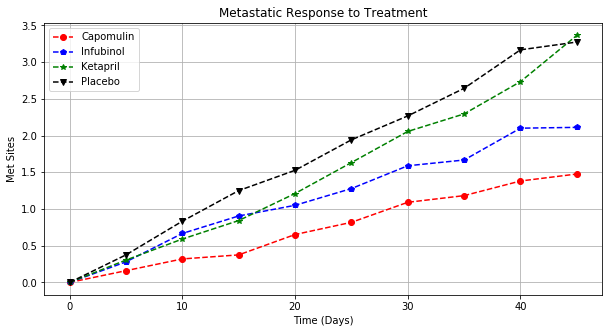

<Figure size 432x288 with 0 Axes>

In [12]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Capomulin'], color = "red", linestyle="--", fmt='o',
            label = "Capomulin")
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Infubinol'], color = "blue", linestyle="--", fmt='p',
            label = "Infubinol")
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Ketapril'], color = "green", linestyle="--",fmt='*',
            label = "Ketapril")
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Placebo'], color = "black", linestyle="--", fmt='v',
            label = "Placebo")

plt.ylabel("Met Sites")
plt.xlabel('Time (Days)')
plt.title('Metastatic Response to Treatment')
plt.grid()
plt.legend()       
plt.show()

# Save the Figure
plt.savefig("../MetSiteResponse.png")

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [13]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount=merged_data.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
micecount_df=pd.DataFrame(micecount["Mouse ID"])
micecount_df.reset_index(inplace=True)

#Preview dataframe
micecount_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [14]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_mice = micecount_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
pivot_table_mice.reset_index(level = None, inplace = True)

# Preview the Data Frame
pivot_table_mice.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


In [15]:
mice_table_fourdrugs = pivot_table_mice[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Placebo"]]
mice_table_fourdrugs.head()

#Calculations for the survival rate

survival_fourdrugs_df = mice_table_fourdrugs.astype(float)
survival_fourdrugs_df["Capomulin_percent"]=survival_fourdrugs_df["Capomulin"]/survival_fourdrugs_df["Capomulin"].iloc[0] * 100
survival_fourdrugs_df["Infubinol_percent"]=survival_fourdrugs_df["Infubinol"]/survival_fourdrugs_df["Infubinol"].iloc[0] * 100
survival_fourdrugs_df["Ketapril_percent"]=survival_fourdrugs_df["Ketapril"]/survival_fourdrugs_df["Ketapril"].iloc[0] * 100
survival_fourdrugs_df["Placebo_percent"]=survival_fourdrugs_df["Placebo"]/survival_fourdrugs_df["Placebo"].iloc[0] * 100
survival_fourdrugs_df

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo,Capomulin_percent,Infubinol_percent,Ketapril_percent,Placebo_percent
0,0.0,25.0,25.0,25.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,25.0,23.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,21.0,22.0,24.0,100.0,84.0,88.0,96.0
3,15.0,24.0,21.0,19.0,20.0,96.0,84.0,76.0,80.0
4,20.0,23.0,20.0,19.0,19.0,92.0,80.0,76.0,76.0
5,25.0,22.0,18.0,19.0,17.0,88.0,72.0,76.0,68.0
6,30.0,22.0,17.0,18.0,15.0,88.0,68.0,72.0,60.0
7,35.0,22.0,12.0,17.0,14.0,88.0,48.0,68.0,56.0
8,40.0,21.0,10.0,15.0,12.0,84.0,40.0,60.0,48.0
9,45.0,21.0,9.0,11.0,11.0,84.0,36.0,44.0,44.0


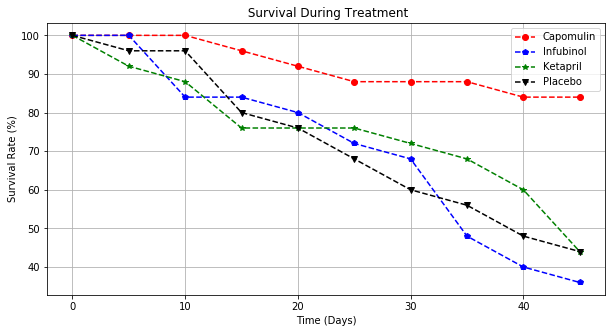

In [16]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (10, 5))


plt.errorbar(x=survival_fourdrugs_df ['Timepoint'],y=survival_fourdrugs_df['Capomulin_percent'], color = "red", 
             linestyle="--", fmt='o', label = "Capomulin")
plt.errorbar(x=survival_fourdrugs_df['Timepoint'],y=survival_fourdrugs_df['Infubinol_percent'], color = "blue", 
             linestyle="--", fmt='p', label = "Infubinol")
plt.errorbar(x=survival_fourdrugs_df['Timepoint'],y=survival_fourdrugs_df['Ketapril_percent'], color = "green", 
             linestyle="--",fmt='*', label = "Ketapril")
plt.errorbar(x=survival_fourdrugs_df['Timepoint'],y=survival_fourdrugs_df['Placebo_percent'], color = "black", 
             linestyle="--", fmt='v', label = "Placebo")

plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.grid()
plt.legend(loc="best")       

# Save the Figure
plt.savefig("../SurvivalRespnse.png")

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
Capomulin_percent=(table_fourdrugs["Capomulin"].iloc[9]-table_fourdrugs["Capomulin"].iloc[0])/table_fourdrugs["Capomulin"].iloc[0]*100
Infubinol_percent=(table_fourdrugs["Infubinol"].iloc[9]-table_fourdrugs["Infubinol"].iloc[0])/table_fourdrugs["Infubinol"].iloc[0]*100
Ketapril_percent=(table_fourdrugs["Ketapril"].iloc[9]-table_fourdrugs["Ketapril"].iloc[0])/table_fourdrugs["Ketapril"].iloc[0]*100
Placebo_percent=(table_fourdrugs["Placebo"].iloc[9]-table_fourdrugs["Placebo"].iloc[0])/table_fourdrugs["Placebo"].iloc[0]*100


# Display the data to confirm
print(Capomulin_percent)
print(Infubinol_percent)
print(Ketapril_percent)
print(Placebo_percent)



-19.475302667894173
46.12347172785187
57.028794686606076
51.29796048315153


In [18]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = {'Capomulin': Capomulin_percent, 'Infubinol': Infubinol_percent, 'Ketapril': Ketapril_percent, 'Placebo': Placebo_percent}
percentchange_tumorvolume = pd.Series(percent_tuple)
percentchange_tumorvolume

#Index the 4 drugs
testdrugs=percentchange_tumorvolume.keys()
testdrugs

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'], dtype='object')

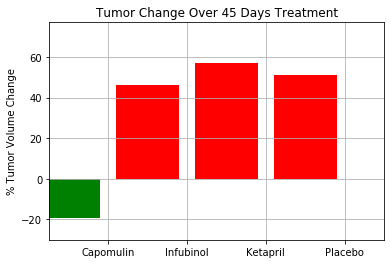

In [21]:
# Store all Relevant Percent Changes into a Tuple
percent_tuple = {'Capomulin': Capomulin_percent, 'Infubinol': Infubinol_percent, 'Ketapril': Ketapril_percent, 'Placebo': Placebo_percent}
percentchange_tumorvolume = pd.Series(percent_tuple)
percentchange_tumorvolume

# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 


summary_bar = plt.subplot()
x_axis = np.arange(0, len(testdrugs))

tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
plt.xticks(tick_locations, testdrugs)
colors = []
for value in percentchange_tumorvolume:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
        
#Plot       
percent_change = summary_bar.bar(x_axis, percentchange_tumorvolume, color=colors, align="center")

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(testdrugs))
plt.ylim(-30, max(percentchange_tumorvolume) + 20)
plt.grid()
plt.show()



![Metastatic Spread During Treatment](../Images/change.png)

In [20]:
#Include 3 observations about the results of the study. 
#Use the visualizations you generated from the study data as the basis for your observations.

#1: According to the first scatter plot and bar graph, Capomulin is reducing the tumor size with continued treatment. 
#2: Mice had a higher survival rate while on Capomulin compared to other drugs in the survival during treatment chart.
#3: In regards to the metastasis rate, Capomulin had a slower rate than the control and other drugs. 